In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#reading the csv file
df = pd.read_csv("combined_df.csv")

In [3]:
#dropping values with negative ride duration
df = df.drop(df[df['started_at'] > df['ended_at']].index)

In [4]:
#checking values with negative ride duration
df[df['started_at']>df['ended_at']]

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588242 entries, 0 to 4588301
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   ride_id             object
 2   rideable_type       object
 3   started_at          object
 4   ended_at            object
 5   start_station_name  object
 6   end_station_name    object
 7   member_casual       object
 8   ride_length         object
 9   weekday             int64 
dtypes: int64(2), object(8)
memory usage: 385.1+ MB


In [6]:
#dropping unncessary columns
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
#usual conversions
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_length'] = pd.to_timedelta(df['ride_length'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588242 entries, 0 to 4588301
Data columns (total 9 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   end_station_name    object         
 6   member_casual       object         
 7   ride_length         timedelta64[ns]
 8   weekday             int64          
dtypes: datetime64[ns](2), int64(1), object(5), timedelta64[ns](1)
memory usage: 350.1+ MB


In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday
0,0D139A3203274B87,classic_bike,2021-01-01 00:02:00,2021-01-01 00:08:00,State St & 33rd St,MLK Jr Dr & 29th St,member,0 days 00:06:00,4
1,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:00,2021-01-01 00:26:00,Lakeview Ave & Fullerton Pkwy,Ritchie Ct & Banks St,member,0 days 00:20:00,4
2,3097EF26414C7016,classic_bike,2021-01-01 00:12:00,2021-01-01 00:12:00,Montrose Harbor,Montrose Harbor,member,0 days 00:00:00,4
3,938D5D1998A5470E,classic_bike,2021-01-01 00:12:00,2021-01-01 00:12:00,Montrose Harbor,Montrose Harbor,casual,0 days 00:00:00,4
4,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:00,2021-01-01 00:43:00,Western Ave & Howard St,Campbell Ave & Fullerton Ave,member,0 days 00:31:00,4


In [10]:
df.describe()

,ride_length,weekday
count,4588242,4.588242e+06
mean,0 days 00:21:48.702287281,3.196890e+00
std,0 days 03:04:25.592898510,2.003729e+00
min,0 days 00:00:00,0.000000e+00
25%,0 days 00:07:00,1.000000e+00
50%,0 days 00:12:00,3.000000e+00
75%,0 days 00:22:00,5.000000e+00
max,38 days 20:24:00,6.000000e+00


In [11]:
#calculating ride length in minutes
df['ride_length_in_minutes'] = (df['ride_length'].dt.seconds + df['ride_length'].dt.days * 24 * 3600)/60


In [12]:
df.describe()

,ride_length,weekday,ride_length_in_minutes
count,4588242,4.588242e+06,4.588242e+06
mean,0 days 00:21:48.702287281,3.196890e+00,2.181170e+01
std,0 days 03:04:25.592898510,2.003729e+00,1.844265e+02
min,0 days 00:00:00,0.000000e+00,0.000000e+00
25%,0 days 00:07:00,1.000000e+00,7.000000e+00
50%,0 days 00:12:00,3.000000e+00,1.200000e+01
75%,0 days 00:22:00,5.000000e+00,2.200000e+01
max,38 days 20:24:00,6.000000e+00,5.594400e+04


In [13]:
#EDA starts
mean_ride_length = df['ride_length_in_minutes'].mean()
median_ride_length = df['ride_length_in_minutes'].median()
mode_weekday = df['weekday'].mode()

In [14]:
print(mean_ride_length)
print(median_ride_length)
print(mode_weekday)

21.811704788021206
12.0
0    5
dtype: int64


Weekdays notation:
0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday

People tend to ride most in Saturday.

There is a noticeable amount of variation in median and mean of ride lengths indicating that riding lengths vary quite significantly. Riding patterns of people in terms of duration vary.

In [15]:
#Max ride length
df[df['ride_length'] == df['ride_length'].max()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday,ride_length_in_minutes
1157578,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:00,2021-07-13 22:51:00,Michigan Ave & Lake St,Malcolm X College Vaccination Site,casual,38 days 20:24:00,5,55944.0


Maximum ride length of 38 days is quite astonishing. It may be due to the fact that bicycle might be possesed for this much of time and returned to end station after 38 days. This is surprising usage for a bike sharing system. It may be due to some error in recording data. The first reason for possessing the cycle for so long is assumed.

In [16]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weekday'>

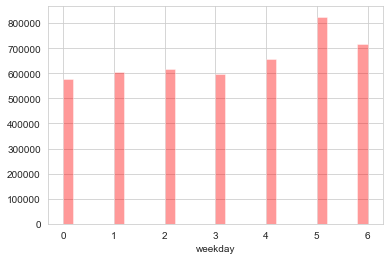

In [17]:
sns.set_style('whitegrid')
sns.distplot(df['weekday'], kde = False, color ='red', bins = 30)

Just testing the graphs. All the plots will be made by using Tableau as it is simply better at this job.

In [18]:
#Mean ride length for members
df[df['member_casual']=='member'].ride_length.mean()

Timedelta('0 days 00:13:11.036092930')

In [19]:
#Mean ride length for casuals
df[df['member_casual']=='casual'].ride_length.mean()

Timedelta('0 days 00:32:30.590435051')

Casuals are riding way longer than members. While casuals may ride for longer distances (vacations) and hence increased trip duration. For members, the usage is typically limited to shorter distances. Members use this for daily trips (office/university to home) and this explains the increased time difference.

In [20]:
#Median_members
df[df['member_casual']=='member'].ride_length.median()

Timedelta('0 days 00:10:00')

In [21]:
#Median_casuals
df[df['member_casual']=='casual'].ride_length.median()

Timedelta('0 days 00:17:00')

Median also tells the same story

In [22]:
#Grouping data by weekdays
df2 = df.groupby('weekday')

In [23]:
df2.first()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,ride_length_in_minutes
weekday,,,,,,,,,
0,93747823B2BF7271,classic_bike,2021-01-04 00:01:00,2021-01-04 00:05:00,State St & 33rd St,Calumet Ave & 33rd St,member,0 days 00:04:00,4.0
1,7F4C42277135AC5A,classic_bike,2021-01-05 00:02:00,2021-01-05 00:06:00,State St & 33rd St,Calumet Ave & 33rd St,member,0 days 00:04:00,4.0
2,BCDE7223D15C9E23,classic_bike,2021-01-06 00:00:00,2021-01-06 00:13:00,Sheffield Ave & Webster Ave,Clark St & Newport St,member,0 days 00:13:00,13.0
3,5C5DD0105CF98E3E,classic_bike,2021-01-07 00:00:00,2021-01-07 00:19:00,Canal St & Harrison St,Canal St & Harrison St,casual,0 days 00:19:00,19.0
4,0D139A3203274B87,classic_bike,2021-01-01 00:02:00,2021-01-01 00:08:00,State St & 33rd St,MLK Jr Dr & 29th St,member,0 days 00:06:00,6.0
5,F1942C45211ABDBE,classic_bike,2021-01-02 00:00:00,2021-01-02 00:04:00,State St & 33rd St,Calumet Ave & 33rd St,member,0 days 00:04:00,4.0
6,AE88F7E989D55FC9,electric_bike,2021-01-03 00:00:00,2021-01-03 00:16:00,Winthrop Ave & Lawrence Ave,Winthrop Ave & Lawrence Ave,casual,0 days 00:16:00,16.0


In [24]:
#Mean ride lengths by weekdays for casual and members
df.groupby(['weekday','member_casual']).ride_length.mean()

weekday  member_casual
0        casual          0 days 00:32:38.133190061
         member          0 days 00:12:43.493973817
1        casual          0 days 00:28:48.200208434
         member          0 days 00:12:23.257551554
2        casual          0 days 00:28:16.310524723
         member          0 days 00:12:27.506952371
3        casual          0 days 00:28:00.670897875
         member          0 days 00:12:21.206673574
4        casual          0 days 00:30:55.124154432
         member          0 days 00:12:47.549243408
5        casual          0 days 00:34:52.331945423
         member          0 days 00:14:49.178421702
6        casual          0 days 00:37:36.124615807
         member          0 days 00:15:11.706846859
Name: ride_length, dtype: timedelta64[ns]

People tend to ride for more durations during weekends

In [25]:
#Median
df.groupby(['weekday','member_casual']).ride_length.median()

weekday  member_casual
0        casual          0 days 00:17:00
         member          0 days 00:09:00
1        casual          0 days 00:15:00
         member          0 days 00:09:00
2        casual          0 days 00:14:00
         member          0 days 00:09:00
3        casual          0 days 00:14:00
         member          0 days 00:09:00
4        casual          0 days 00:16:00
         member          0 days 00:10:00
5        casual          0 days 00:19:00
         member          0 days 00:11:00
6        casual          0 days 00:20:00
         member          0 days 00:11:00
Name: ride_length, dtype: timedelta64[ns]

In [26]:
#no. of trips per day for member and casual

df.groupby(['weekday']).ride_id.count()

weekday
0    575424
1    603068
2    615840
3    597680
4    655827
5    825411
6    714992
Name: ride_id, dtype: int64

People tend to ride more during weekends

In [27]:
#extracting months
df['month'] = pd.DatetimeIndex(df['started_at']).month

In [28]:
#grouping data by months
df.groupby(['month']).ride_id.count()

month
1      83509
2      42996
3     205691
4     298207
5     450993
6     608777
7     692321
8     674403
9     621135
10    477972
11    255867
12    176371
Name: ride_id, dtype: int64

During cold months, people tend to ride less as compared to warm months

In [29]:
#no. of trips by months for casual and members
df.groupby(['month','member_casual']).ride_id.count()

month  member_casual
1      casual            14690
       member            68819
2      casual             8613
       member            34383
3      casual            75642
       member           130049
4      casual           120420
       member           177787
5      casual           216829
       member           234164
6      casual           304191
       member           304586
7      casual           369415
       member           322906
8      casual           341473
       member           332930
9      casual           292930
       member           328205
10     casual           189117
       member           288855
11     casual            69958
       member           185909
12     casual            45076
       member           131295
Name: ride_id, dtype: int64

The disparity in ride numbers between casuals and members is seen during cold months. In warm months, very minimal disparity is shown.

In [30]:
#no. of rides per category for casual and members
df.groupby(['rideable_type','member_casual']).ride_id.count()

rideable_type  member_casual
classic_bike   casual           1261546
               member           1980405
docked_bike    casual            312043
               member                 1
electric_bike  casual            474765
               member            559482
Name: ride_id, dtype: int64

Most preffered type of bike is classical bike among both casuals and members.
Least preffered is docked bike.

In [33]:
df['Hour'] = df['started_at'].dt.hour

In [35]:
df.groupby(['Hour']).ride_id.count()

Hour
0      67558
1      47030
2      28558
3      15325
4      12684
5      34395
6      91043
7     166400
8     199296
9     169124
10    190770
11    239391
12    280438
13    286437
14    288319
15    318365
16    384657
17    469631
18    404630
19    296212
20    204309
21    159984
22    134991
23     98695
Name: ride_id, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588242 entries, 0 to 4588301
Data columns (total 12 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   ride_id                 object         
 1   rideable_type           object         
 2   started_at              datetime64[ns] 
 3   ended_at                datetime64[ns] 
 4   start_station_name      object         
 5   end_station_name        object         
 6   member_casual           object         
 7   ride_length             timedelta64[ns]
 8   weekday                 int64          
 9   ride_length_in_minutes  float64        
 10  month                   int64          
 11  Hour                    int64          
dtypes: datetime64[ns](2), float64(1), int64(3), object(5), timedelta64[ns](1)
memory usage: 455.1+ MB


In [37]:
#finalized data for tableau visualization
df.to_csv('Finalized.csv')
